# Contents
01. Import Libraries
02. Import Datasets
03. Wrangle / Clean / Check New Customer Dataset
04. Combine Data
05. Export as Pickle

# 01. Import Libraries

In [25]:
!pip install seaborn matplotlib scipy

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# 02. Import Datasets

In [28]:
# Defines path as intro file path for Instacart project

path = r'/home/0668a905-109d-4403-be59-0a04abf51dd9/Instacart Basket Analysis'

In [30]:
# Imports orders_products_aggregates dataframe

ords_prods_merge = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_aggregates.pkl'))

In [32]:
# Imports new customer dataframe

df_customers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))

In [34]:
# Remove scientific notation floats

pd.set_option('display.float_format', '{:.2f}'.format)

# 03. Wrangle / Clean / Check New Customer Dataset

## Review Data

In [36]:
df_customers.shape

(206209, 10)

In [38]:
df_customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [40]:
df_customers.describe()

,user_id,Age,n_dependants,income
count,206209.00,206209.00,206209.00,206209.00
mean,103105.00,49.50,1.50,94632.85
std,59527.56,18.48,1.12,42473.79
min,1.00,18.00,0.00,25903.00
25%,51553.00,33.00,0.00,59874.00
50%,103105.00,49.00,1.00,93547.00
75%,154657.00,66.00,3.00,124244.00
max,206209.00,81.00,3.00,593901.00


## Rename Columns

In [42]:
df_customers.rename(columns = {'Surnam' : 'last_name'}, inplace = True)

In [44]:
df_customers.rename(columns = {'First Name' : 'first_name'}, inplace = True)

In [46]:
df_customers.rename(columns = {'STATE' : 'state_name'}, inplace = True)

In [48]:
df_customers.rename(columns = {'Age' : 'age_customer'}, inplace = True)

In [50]:
df_customers.rename(columns = {'fam_status' : 'marital_status'}, inplace = True)

In [52]:
df_customers.rename(columns = {'Gender' : 'gender'}, inplace = True)

In [54]:
df_customers.rename(columns = {'n_dependants' : 'number_dependants'}, inplace = True)

In [56]:
# Check output of column name changes

df_customers.head()

,user_id,first_name,last_name,gender,state_name,age_customer,date_joined,number_dependants,marital_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


## Eliminate Unnecessary Columns

Because the purpose of the report would not require customer name information and to further protect their data, 'first_name' & 'last_name" columns will be removed from the dataset.

In [58]:
# Test visual of removing 'first_name' and 'last_name'

df_customers.drop(columns = ['first_name', 'last_name'])

,user_id,gender,state_name,age_customer,date_joined,number_dependants,marital_status,income
0,26711,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Female,Maryland,26,1/1/2017,1,married,40374
...,...,...,...,...,...,...,...,...
206204,168073,Female,North Carolina,44,4/1/2020,1,married,148828
206205,49635,Male,Hawaii,62,4/1/2020,3,married,168639
206206,135902,Female,Missouri,66,4/1/2020,2,married,53374
206207,81095,Female,California,27,4/1/2020,1,married,99799


In [60]:
# Resave column drops as new df

df_customers_2 = df_customers.drop(columns = ['first_name', 'last_name'])

In [62]:
# Check output

df_customers_2.head()

,user_id,gender,state_name,age_customer,date_joined,number_dependants,marital_status,income
0,26711,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Female,Maryland,26,1/1/2017,1,married,40374


## Check for Missing Data

In [64]:
# Check data types & non-null counts

df_customers_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            206209 non-null  int64 
 1   gender             206209 non-null  object
 2   state_name         206209 non-null  object
 3   age_customer       206209 non-null  int64 
 4   date_joined        206209 non-null  object
 5   number_dependants  206209 non-null  int64 
 6   marital_status     206209 non-null  object
 7   income             206209 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 12.6+ MB


#### Notes:

There doesn't appear to be any missing or non-null variables in this data (only first name had missing data, but column was removed). So now will check for duplicates.

## Check for Duplicates

In [66]:
# Create a new subset for any duplicate rows

df_dups = df_customers_2[df_customers_2.duplicated()]

In [68]:
# Check output of duplicates df

df_dups

,user_id,gender,state_name,age_customer,date_joined,number_dependants,marital_status,income


#### Notes:

No duplicate rows appear so will continue with exploration.

## Check for Mixed Datatypes

In [70]:
# Check for mixed datatypes in the df_customers_2 df

for col in df_customers_2.columns.tolist():
  weird = (df_customers_2[[col]].map(type) != df_customers_2[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_customers_2[weird]) > 0:
    print (col)

#### Notes:

No mixed data types were reported.

Next will check to make sure the variable key user_id matches the data type in the ords_prods_merge df

In [72]:
# Check datatypes of the ords_prods_merge dataframe

ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480944 entries, 0 to 6480943
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int32  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float32
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  mean_price              float32
 20  spender_flag            object 
 21  median_order            float64

In [74]:
# Check datatypes of the df_customers_2 dataframe


df_customers_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            206209 non-null  int64 
 1   gender             206209 non-null  object
 2   state_name         206209 non-null  object
 3   age_customer       206209 non-null  int64 
 4   date_joined        206209 non-null  object
 5   number_dependants  206209 non-null  int64 
 6   marital_status     206209 non-null  object
 7   income             206209 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 12.6+ MB


#### Notes:

user_id in both dataframes is the same dtype (int64), so no need to change any data types!

## Check for Outliers

In [76]:
df_customers_2['income'].describe()

count   206209.00
mean     94632.85
std      42473.79
min      25903.00
25%      59874.00
50%      93547.00
75%     124244.00
max     593901.00
Name: income, dtype: float64

#### Notes:

When using .describe() on dataframe above, both customer ages and number of dependents seemed reasonable, but the income seemed like it could have some outliers that might skew the dataset. Will investigate further with some basic statistical analysis.

In [78]:
# Check mean of income

df_customers_2['income'].mean()

94632.85254765795

In [80]:
# Check median of income

df_customers_2['income'].median()

93547.0

In [82]:
# Check max of income

df_customers_2['income'].max()

593901

#### Notes:

$$593,901 is quite a lot bigger than the median income of $93,547, so will use a scatterplot to better visualize and see where to cut out some of the customer profiles.

<Axes: xlabel='income', ylabel='income'>

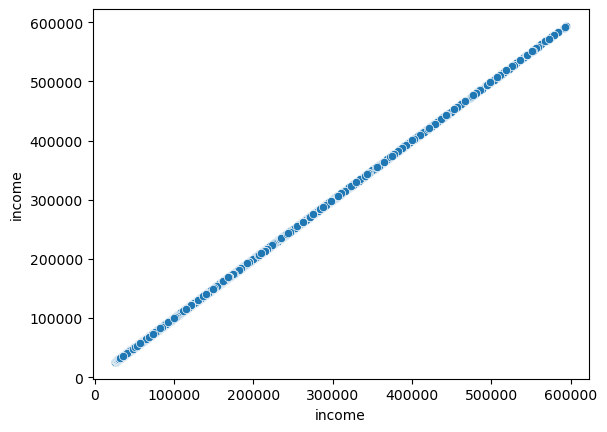

In [84]:
# Create a scatterplot of the income column

sns.scatterplot(x = 'income', y = 'income',data = df_customers_2)

<Axes: ylabel='Frequency'>

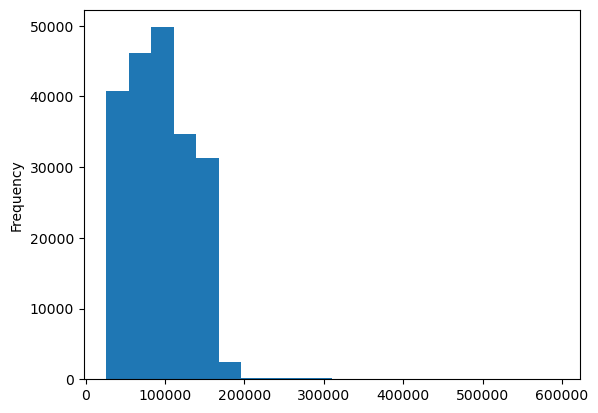

In [86]:
# Create histogram of income column

df_customers_2['income'].plot.hist(bins = 20)

In [88]:
# Looking for the outlier income (over $125,000 chosen as this was the 75% quartile)

df_customers_2[['state_name', 'number_dependants', 'age_customer','income']].loc[df_customers_2['income'] > 125000]

,state_name,number_dependants,age_customer,income
0,Missouri,3,48,165665
8,Texas,1,47,162432
14,Colorado,2,51,146559
21,Arkansas,1,77,125977
24,Montana,0,72,135302
...,...,...,...,...
206196,Colorado,2,45,150954
206197,Minnesota,0,52,140700
206199,Wyoming,0,77,162239
206204,North Carolina,1,44,148828


In [90]:
# Looking for the outlier income over $500,000

df_customers_2[['state_name', 'number_dependants', 'age_customer','income']].loc[df_customers_2['income'] > 500000]

,state_name,number_dependants,age_customer,income
2018,Mississippi,2,65,577728
6515,Louisiana,0,48,518122
12044,Vermont,0,75,576876
21704,Maryland,3,49,559700
21726,Washington,2,75,593901
...,...,...,...,...
199982,Hawaii,0,46,550917
200450,Indiana,1,57,579397
200774,Michigan,1,81,571932
202655,Washington,2,43,592409


#### Notes:

Because at least a quarter of the customers are above the 125,000 dollar mark and even 70 customers above the 500,000 dollar income level (and scatterplot looked relatively consistent), it seems relevant to keep all income levels and not eliminate any for this dataset. No one income seemed to be an odd outlier.

# 04. Combine Data

## Merge df_customers_2 and ords_prods_merge_2

In [100]:
# Merge df_customers_2 & df_ords_prods

cust_ords_prods = ords_prods_merge.merge(df_customers_2, on = 'user_id', indicator = True)

In [106]:
# Set the display option to show all columns

pd.set_option('display.max_columns', None)

In [109]:
# Check merge output

cust_ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_flag,median_order,order_frequency_flag,gender,state_name,age_customer,date_joined,number_dependants,marital_status,income,_merge
0,2617132,55630,6,2,15,5.00,31766,13,0,Cheese Pizza Snacks,129,1,14.30,Mid-range product,Regularly busy,Regularly busy,Most orders,50,Loyal customer,7.55,Low spender,5.00,Frequent customer,Female,Rhode Island,29,10/5/2017,2,married,71955,both
1,1262501,55630,17,2,14,12.00,27966,1,1,Organic Raspberries,123,4,4.40,Low-range product,Regularly busy,Regularly busy,Most orders,50,Loyal customer,7.55,Low spender,5.00,Frequent customer,Female,Rhode Island,29,10/5/2017,2,married,71955,both
2,841284,55630,26,2,10,4.00,27966,1,1,Organic Raspberries,123,4,4.40,Low-range product,Regularly busy,Regularly busy,Most orders,50,Loyal customer,7.55,Low spender,5.00,Frequent customer,Female,Rhode Island,29,10/5/2017,2,married,71955,both
3,3046848,55630,50,4,14,3.00,25659,6,0,Organic Coconut Milk,91,16,4.10,Low-range product,Least busy,Least busy days,Most orders,50,Loyal customer,7.55,Low spender,5.00,Frequent customer,Female,Rhode Island,29,10/5/2017,2,married,71955,both
4,1916379,55630,41,1,8,5.00,13176,9,1,Bag of Organic Bananas,24,4,10.30,Mid-range product,Regularly busy,Busiest days,Average orders,50,Loyal customer,7.55,Low spender,5.00,Frequent customer,Female,Rhode Island,29,10/5/2017,2,married,71955,both


In [112]:
# perform merge flag

cust_ords_prods['_merge'].value_counts()

_merge
both          6480944
left_only           0
right_only          0
Name: count, dtype: int64

In [115]:
# Check merged dataframe shape

cust_ords_prods.shape

(6480944, 31)

In [118]:
# Remove '_merge' column

cust_ords_prods_2 = cust_ords_prods.drop(columns = '_merge')

# 05. Export as Pickle

In [124]:
# Export merged dataframe as pickle

cust_ords_prods_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders_products.pkl'))